In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import tensorflow as tf
from zipfile import ZipFile
import os
from skimage.io import imread
from skimage.transform import resize 
import matplotlib.pyplot as plt
import random
import warnings
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from googleapiclient.discovery import build
import os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam
from keras.optimizers import sgd
from keras.layers import LeakyReLU
from numpy import asarray
from numpy import save
from numpy import load

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`


In [0]:
# there were 2 folders named train and test with training folder with 12 sub-folder, named with class name.

In [0]:
X_test=[]
X_test_n=[]
os.chdir('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/test') # changing directory

In [4]:
for i in tqdm(os.listdir()):
  img = cv2.imread(i) # reading all test images
  img = cv2.resize(img,(128,128)) #resize to have all the images of same size  
  X_test.append(img)
  X_test_n.append(i)

In [0]:
X_test[0].shape 

(128, 128, 3)

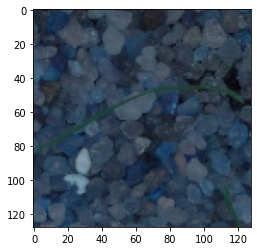

In [0]:
plt.imshow(X_test[0])

In [0]:
X_test_n[0:10]

['31f3dd81f.png',
 '3abb502fb.png',
 '5b63dcc21.png',
 'b4c3df835.png',
 '54b3afd58.png',
 '550a8b7e6.png',
 '8585f9718.png',
 '25a4c427e.png',
 'e478c452c.png',
 '48d97c645.png']

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/train') # having a look at one of the subfolders of the train folder

In [0]:
os.listdir()

['Shepherds Purse',
 'Fat Hen',
 'Common wheat',
 'Black-grass',
 'Small-flowered Cranesbill',
 'Charlock',
 'Maize',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Common Chickweed',
 'Sugar beet',
 'Cleavers']

In [0]:
for i in os.listdir():
  path, dirs, files = next(os.walk(i))
  print (i + " : " + str(len(files)))

Shepherds Purse : 231
Fat Hen : 475
Common wheat : 221
Black-grass : 263
Small-flowered Cranesbill : 496
Charlock : 390
Maize : 221
Scentless Mayweed : 516
Loose Silky-bent : 654
Common Chickweed : 611
Sugar beet : 385
Cleavers : 287


In [0]:
# highly imbalance dataset. Image augmentation must be performed otherwise the model will be bias towards the class having higher samples if the model is fed with those imabalnced data

In [0]:
def rand_rotation(img_arr: ndarray):
    #random degree between 25% left and 25% right
    rand_deg = random.uniform(-25, 25)
    return sk.transform.rotate(img_arr, rand_deg)

def rand_noise(img_arr: ndarray):
    #random noise
    return sk.util.random_noise(img_arr)

def h_flip(img_arr: ndarray):
    # horizontal flip
    return img_arr[:, ::-1]
  
# dictionary of transformations
available_transformations = {
    'rotate': rand_rotation,
    'noise': rand_noise,
    'horizontal_flip': h_flip
}

In [0]:
num_files_desired = 700
num_files = 0

for i in tqdm(os.listdir()):
    if (os.path.isdir(i)):
            Images = []
            folder_path = "/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/train/" + i
            for j in os.listdir(i):
                Images.append(folder_path + "/" + j)
            
            Img_cnt = len(Images)
            Cnt_diff = num_files_desired - Img_cnt
            num_generated_files = 0
            while num_generated_files < Cnt_diff:
                # random image from the folder
                image_path = random.choice(Images)
                # read image as an two dimensional array of pixels
                image_to_transform = sk.io.imread(image_path)

                # random num of transformation to apply
                num_transformations_to_apply = random.randint(1, len(available_transformations))

                num_transformations = 0
                transformed_image = None
                while num_transformations <= num_transformations_to_apply:
                    # random transformation to apply for a single image
                    key = random.choice(list(available_transformations))
                    transformed_image = available_transformations[key](image_to_transform)
                    num_transformations += 1

                    new_file_path = '%s/augmented_image_%s.png' % (folder_path, num_files)

                    # write image to the disk
                    io.imsave(new_file_path, transformed_image)
                    num_generated_files += 1
                    num_files += 1

In [0]:
# post augmentation 
for i in os.listdir():
  path, dirs, files = next(os.walk(i))
  print (i + " : " + str(len(files)))

Cleavers : 700
Sugar beet : 700
Common Chickweed : 700
Loose Silky-bent : 703
Charlock : 701
Black-grass : 700
Common wheat : 701
Fat Hen : 703
Small-flowered Cranesbill : 700
Shepherds Purse : 701
Maize : 702
Scentless Mayweed : 700


In [0]:
X_train=[]
y_train=[]

In [7]:
for i in tqdm(os.listdir()):
    print("class: ",i)
    for j in os.listdir(i):
      img = cv2.imread( i + "/" + j)
      img = cv2.resize(img,(128,128))
      X_train.append(img)
      y_train.append(i)

class:  Cleavers
class:  Sugar beet
class:  Common Chickweed
class:  Loose Silky-bent
class:  Charlock
class:  Black-grass
class:  Common wheat
class:  Fat Hen
class:  Small-flowered Cranesbill
class:  Shepherds Purse
class:  Maize
class:  Scentless Mayweed



In [8]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)


In [0]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)

In [11]:
print("Total categories: ", len(np.unique(y_train)))

Total categories:  12


In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=12)

In [0]:
y_train = np.array(y_train)
X_train = np.array(X_train)

In [15]:
X_train2 , X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=43)
print (len(X_train2))
print (len(X_test2))

6728
1683


In [16]:
print("X_train2 Shape: ", X_train2.shape)
print("X_test2 Shape: ", X_test2.shape)
print("y_train2 Shape: ", y_train2.shape)
print("y_test2 Shape: ", y_test2.shape)

X_train2 Shape:  (6728, 128, 128, 3)
X_test2 Shape:  (1683, 128, 128, 3)
y_train2 Shape:  (6728, 12)
y_test2 Shape:  (1683, 12)


In [0]:
data1 = asarray(X_train2)
data2 = asarray(X_test2)
data3 = asarray(y_train2)
data4 = asarray(y_test2)
data5 = asarray(X_test)
data6 = asarray(X_test_n)
save('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data1.npy', data1)
save('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data2.npy', data2)
save('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data3.npy', data3)
save('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data4.npy', data4)
save('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data5.npy', data5)
save('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data6.npy', data6)

In [0]:
X_train2 = load('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data1.npy')
X_test2 = load('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data2.npy')
y_train2 = load('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data3.npy')
y_test2 = load('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data4.npy')
X_test = load('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data5.npy')
X_test_n = load('/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Image Array/data6.npy')

In [0]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (128,128,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Flatten()) 

# fully connected layer
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 12, activation = 'softmax'))

In [0]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [8]:
m1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)      

In [11]:
m1_h1 = m1.fit(X_train2,y_train2,
                    epochs=30, 
                    validation_data=(X_test2,y_test2),
                    verbose = 1,
                    initial_epoch=0)

Train on 6728 samples, validate on 1683 samples
Epoch 1/30
6728/6728 [==============================] - 40s 6ms/step - loss: 1.8885 - accuracy: 0.3017 - val_loss: 1.5944 - val_accuracy: 0.4118
Epoch 2/30
6728/6728 [==============================] - 40s 6ms/step - loss: 1.0448 - accuracy: 0.6265 - val_loss: 0.8386 - val_accuracy: 0.7166
Epoch 3/30
6728/6728 [==============================] - 40s 6ms/step - loss: 0.6640 - accuracy: 0.7649 - val_loss: 0.6390 - val_accuracy: 0.7831
Epoch 4/30
6728/6728 [==============================] - 40s 6ms/step - loss: 0.4338 - accuracy: 0.8517 - val_loss: 0.5151 - val_accuracy: 0.8247
Epoch 5/30
6728/6728 [==============================] - 40s 6ms/step - loss: 0.3121 - accuracy: 0.8897 - val_loss: 0.4606 - val_accuracy: 0.8461
Epoch 6/30
6728/6728 [==============================] - 40s 6ms/step - loss: 0.2554 - accuracy: 0.9059 - val_loss: 0.5718 - val_accuracy: 0.8360
Epoch 7/30
6728/6728 [==============================] - 40s 6ms/step - loss: 0.194

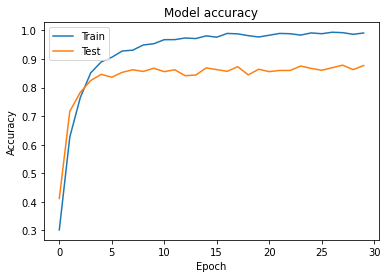

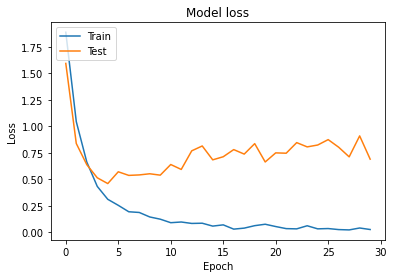

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(m1_h1.history['accuracy'])
plt.plot(m1_h1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(m1_h1.history['loss'])
plt.plot(m1_h1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [0]:
m2 = Sequential()
m2.add(BatchNormalization(input_shape = (128,128,3)))
m2.add(Convolution2D(32, (3,3), input_shape = (128, 128, 3), kernel_initializer = 'lecun_uniform')) 
m2.add(LeakyReLU(alpha=0.1))
m2.add(MaxPooling2D(pool_size=2))


m2.add(Convolution2D(filters=64, kernel_size=5, padding='same', kernel_initializer = 'lecun_uniform'))
m2.add(LeakyReLU(alpha=0.1))
m2.add(MaxPooling2D(pool_size=2))


m2.add(Convolution2D(filters=64, kernel_size=5, padding='same', kernel_initializer = 'lecun_uniform'))
m2.add(LeakyReLU(alpha=0.1))
m2.add(MaxPooling2D(pool_size=2))

m2.add(Convolution2D(filters=128, kernel_size=3, padding='same', kernel_initializer = 'lecun_uniform'))
m2.add(LeakyReLU(alpha=0.1))
m2.add(MaxPooling2D(pool_size=2))


m2.add(Convolution2D(filters=128, kernel_size=2, padding='same', kernel_initializer = 'lecun_uniform'))
m2.add(LeakyReLU(alpha=0.1))
m2.add(MaxPooling2D(pool_size=2))


m2.add(Flatten()) 

# fully connected layer
m2.add(Dense(units=128, kernel_initializer = 'lecun_uniform'))
m2.add(LeakyReLU(alpha=0.1))
m2.add(Dense(units = 64, kernel_initializer = 'lecun_uniform'))
m2.add(LeakyReLU(alpha=0.1))

m2.add(Dense(units = 32, kernel_initializer = 'lecun_uniform'))
m2.add(LeakyReLU(alpha=0.1))
#output layer
m2.add(Dense(units = 12, activation = 'softmax'))

In [0]:
m2.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [25]:
m2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 63, 63, 64)        51264     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 63, 63, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)       

In [31]:
m2_h2 = m2.fit(X_train2,y_train2,
                    epochs=50, 
                    validation_data=(X_test2,y_test2),
                    verbose = 1,
                    initial_epoch=0, batch_size=60)

Train on 6728 samples, validate on 1683 samples
Epoch 1/1
6728/6728 [==============================] - 58s 9ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.5532 - val_accuracy: 0.9144


In [0]:
pred_val = m2.predict(X_test2)

In [35]:
print ("Val Accuracy: ", metrics.accuracy_score(np.argmax(y_test2, axis=1), np.argmax(pred_val, axis=1)))

Val Accuracy:  0.9144385026737968


In [36]:
print ("Classification Scores for Validation data")
print(classification_report(np.argmax(y_test2, axis=1), np.argmax(pred_val, axis=1)))

Classification Scores for Validation data
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       138
           1       0.94      0.96      0.95       141
           2       0.97      0.95      0.96       150
           3       0.90      0.95      0.93       170
           4       0.95      0.92      0.94       145
           5       0.96      0.88      0.92       133
           6       0.74      0.85      0.79       128
           7       0.92      0.97      0.94       155
           8       0.88      0.90      0.89       126
           9       0.95      0.92      0.93       131
          10       0.91      0.95      0.93       130
          11       0.97      0.93      0.95       136

    accuracy                           0.91      1683
   macro avg       0.92      0.91      0.91      1683
weighted avg       0.92      0.91      0.91      1683



In [0]:
#The category 0 and 6 have very less f1 score.  the model can be made to learn more on these categories.  more augmentation in these categories can be done and  model can be made learn better

In [0]:
# Evaluate Model on Test Set

In [0]:
X_test = np.array(X_test)

In [0]:
pred_f= m2.predict(X_test)

In [0]:
final_pred = np.argmax(pred_f ,axis=1)

In [42]:
final_pred

array([11,  5, 10,  3,  3,  6, 11, 11,  5,  6,  3,  6, 10, 11,  8, 11,  5,
        8,  8,  3,  9, 10,  3,  5,  9, 11,  7,  3,  8,  9,  9,  3, 11,  0,
        6,  7,  6,  8,  3, 10,  4,  7,  7, 11, 11,  5,  7,  9, 11,  7,  6,
        2,  6,  5,  1, 10,  7,  8,  2,  6, 11,  6,  1,  5,  4,  7,  6,  2,
       10,  9,  3, 10,  8,  3,  3,  8,  8,  4, 11,  9,  3, 11,  8,  3,  8,
        4,  6,  6,  2,  8,  3,  1,  6,  6,  5,  0,  6,  5,  9,  5, 11, 11,
        8, 10, 10,  3,  7,  5,  5, 11,  9, 11,  2,  2,  1,  2,  9,  6,  3,
        1,  9, 11,  3,  5,  7,  6,  2, 11,  1, 11,  9,  4,  9,  5,  5,  4,
        1,  7,  5,  9, 11,  9, 10,  3,  6,  3, 11,  5,  5,  5,  4,  6,  7,
        8,  1, 11, 10,  6,  1,  6,  2, 10,  3,  6,  5,  8,  5,  0,  3,  3,
        3,  8,  9,  3,  3,  4,  7,  3,  9,  9,  0,  2,  5,  6,  8, 10,  6,
        6,  5,  3,  8,  6,  6,  6,  6, 10,  4,  3,  3,  1,  6,  1,  0,  8,
        5, 10,  2,  6,  1,  2,  1,  1,  5,  2,  7, 10,  0,  5,  9,  9,  5,
        3,  3,  5,  5,  6

In [0]:
y_test = le.inverse_transform(final_pred)

In [0]:
y_test

In [0]:
X_test_name = np.array(X_test_name)
y_test = np.array(y_test)
dataset = pd.DataFrame({'file': X_test_name, 'species': y_test}, columns=['file', 'species'])

In [0]:
dataset.head()

,file,species
0,248436078.png,Cleavers
1,69d1669f8.png,Charlock
2,2d992d1fb.png,Loose Silky-bent
3,bfab3e3d0.png,Sugar beet
4,fb022edf9.png,Fat Hen


In [0]:
dataset.to_csv("/content/drive/My Drive/Colab Notebooks/Great Learning/plant-seedlings-classification/Ans/Ans.csv", index=False)